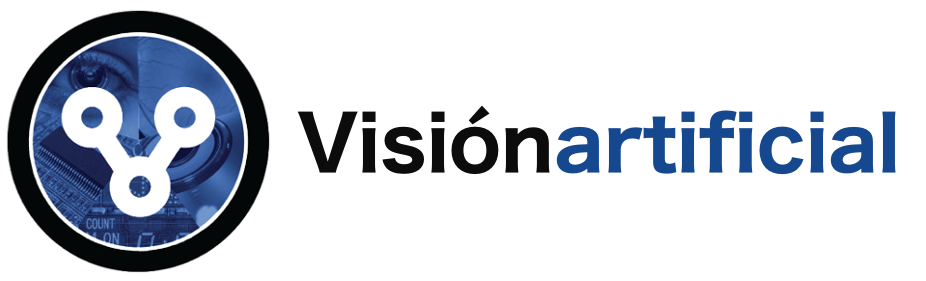

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos Fast Hessian</font>

Continuando coa tendencia dos nomes de detectores de puntos clave ambiguos en OpenCV, temos o detector Fast Hessian, que en realidade se chama **SURF** dentro de OpenCV. Este detector foi introducido por Bay et al. no seu artigo de ECCV de 2006, [SURF: Speeded Up Robust Features](./artigos/bay_2006.pdf). E do mesmo xeito que David Lowe [Object recognition from local scale-invariant features](./artigos/lowe_1999.pdf), quedamos con dous termos ambiguos.

O algoritmo real do detector de puntos clave detrás de SURF chámase **"Fast Hessian"**, mentres que o algoritmo descritor de imaxes chámase **SURF**.

Antes de estudar o algoritmo SURF, imos ter unha lección de historia rápida: cando se introducían descritores invariantes locais como SIFT e SURF, houbo unha tendencia na que os algoritmos propostos incluían tanto un detector de puntos clave como ao descritor de imaxes.Por esta razón, é bastante habitual que tanto os detector como o descritor compartan o mesmo nome. Polo tanto, temos certa ambigüidade entre SIFT e SURF, e moitas veces é útil aclarar se estamos a falar do detector de puntos ou do descritor.


# <font style="color:rgb(50,120,229)">Obxectivo:</font>

Neste caderno, revisaremos o detector de puntos **Fast Hessian**, que se chama comunmente detector **"SURF"**.

# <font style="color:rgb(50,120,229)">Como funciona o detector SURF?</font>

A motivación para Fast Hessian e SURF veu da baixa velocidade de DoG e SIFT. Os investigadores de visión querían un detector de puntos clave e un descritor de imaxes máis rápidos, e atopárono en Fast Hessian e SURF.

O Fast Hessian está construído cos mesmos principios que DoG, xa que os puntos clave deben ser repetibles e recoñecibles a diferentes escalas dunha imaxe. Non obstante, en lugar de calcular a Diferenza de Gaussianas de forma explícita como se fai en DoG, Bay et al. propuxo que, en cambio, aproximemos o paso da DoG utilizando as bases de Haar e imaxes integrais.

Os detalles matemáticos do algoritmo de Fast Hessian podes atopalos no artigo de Bay et al, pero a idea principal é substituir os kernels de gaussianas e as diferencias en octavas por filtros tipo "caixa" que aproximen o resultado das DoG pero máis rápidos:
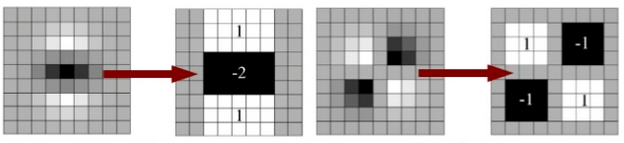


E a partir de aí, construímos a nosa matriz hessiana (segundas derivadas):

$$H = \begin{bmatrix} L_ {xx} & L_{xy}\\ L_{yx} & L_{yy} \end{bmatrix}$$


A continuación márcase unha rexión como "punto clave" se ten unha puntuación maior nun vecindario de $3 \times 3 \times 3$, que inclúa os seus veciños circundantes e as oitavas por riba e por debaixo dela (semellante a SIFT, pero esta vez só estamos interesado no máximo, non no máximo ou mínimo).

Na práctica, o detector de puntos clave Fast Hessian é realmente máis rápido que o detector de puntos clave DoG. E nalgúns casos, incluso pode ser apropiado para aplicacións en tempo real. Non obstante, se buscas un rendemento en tempo real, considera usar FAST ou as extensións do detector de puntos clave FAST que revisaremos máis adiante neste módulo.

## Para que se emprega o Fast Hessian

Do mesmo xeito que DoG, o detector de puntos Fast Hessian utilízase para localizar rexións repetibles, tipo "blob" nunha imaxe. Estas rexións poden ser bordes, esquinas ou ambos.

Vexamos como se poden obter estes puntos con OpenCV:

In [1]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [5]:
#cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detector Fast Hessian para OpenCV > 3.x
#E o detector empregado por SURF
detector = cv2.xfeatures2d.SURF_create()
(kps, _) = detector.detectAndCompute(gray, None)
print("# de keypoints: {}".format(len(kps)))

# Lazo sobre o numero de puntos e os marcamos cun circulo
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));

error: OpenCV(4.5.1) /tmp/pip-req-build-jr1ur_cf/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1027: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
